# Final Project - <u>UK Road Safety: Traffic Accidents and Vehicles</u>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## <u> 1. Data Set Description <u>

<ul>
<li> <b> acci_df: </b> Each line represents a single traffic accident (identified by the Accident_Index column) and its various properties. </li>
<li> <b> veh_df: </b> Each line represents the involvement of a unique vehicle in a unique accident, featuring various properties regarding the vehicle itself and its passengers. </li>
<li> <b> df </b> is the merged dataset between <b> acci_df </b> and <b> veh_df </b>.</li>
</ul>

Important columns in <b> df </b>are:
<ol>
<li><b>Accident_Severity</b>: 0 means slight injury, 1 means severe injury or death.</li>
<li><b>Pedestrian_Crossing-Physical_Facilities</b>: if physical facilities is available for pedestrain crossing.</li>

<li><b>Month</b>: month when the accident happened.</li>
<li><b>Day_of_Week</b>: day of week when the accident happened.</li>
<li><b>Light_Conditions</b>: conditions include Daylight, Darkness - lights lit, Darkness - lights unlit, etc.</li>
<li><b>Road_Type</b>: types include single carriageway, double carriageway, roundabout, etc.</li>
<li><b>Speed_Limit</b>: numerical figures indicating the suggested speed.</li>
<li><b>Urban_or_Rural_Area</b>: if where the accident happened is urban or rural.</li>
<li><b>Road_Surface_Conditions</b>: conditions include dry, slipepry, flood, etc.</li>
<li><b>Age_Band_of_Driver</b>: age group of the driver.</li>
<li><b>Sex_of_Driver</b>: gender of the driver.</li>
<li><b>Age_of_Vehicle</b>: age group of the vehicle, mostly with 10 years as the gap.</li>
<li><b>Vehicle_Type</b>: includes Car, Motorcycle, bus, agricultural vehicle), Pedal Cycle, etc.</li>
<li><b>Vehicle_Manoeuvre</b>: type of action of the driver when the accident happened.</li>
</ol>

#### Step 1. <b>acci_df</b>: This file is pretty large and it probably takes some time to read.

In [2]:
acci_df = pd.read_csv('Accident_Information.csv')

In [3]:
acci_df = acci_df[acci_df.Year == 2016]

In [4]:
acci_df.head(2)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1780653,2016010000005,A,4006.0,NaN,0.0,Slight,None,2016-11-01,Tuesday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,02:30,Urban,Fine no high winds,2016,No
1780654,2016010000006,A,207.0,Unclassified,0.0,Slight,None,2016-11-01,Tuesday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:37,Urban,Fine no high winds,2016,No


<ul><li>In order to be efficient, we removed columns that are unnecessary for the analysis.</li></ul>
<ol>
<li>Drop 1st_Road_Class, 1st_Road_Number, 2nd_Road_Class, 2nd_Road_Number, Carriageway_Hazards, etc.</li>
<li>Keep Road_Surface_Conditions instead of Weather_Conditions.</li>

In [5]:
acci_df = acci_df[['Accident_Index', 'Accident_Severity', 'Pedestrian_Crossing-Physical_Facilities', 'Date', \
                   'Day_of_Week', 'Light_Conditions', 'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', \
                   'Road_Surface_Conditions']]

In [6]:
acci_df.head(2)

,Accident_Index,Accident_Severity,Pedestrian_Crossing-Physical_Facilities,Date,Day_of_Week,Light_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Road_Surface_Conditions
1780653,2016010000005,Slight,0.0,2016-11-01,Tuesday,Darkness - lights unlit,Single carriageway,30.0,Urban,Dry
1780654,2016010000006,Slight,0.0,2016-11-01,Tuesday,Darkness - lights lit,Single carriageway,30.0,Urban,Dry


#### Step2. <b>vehi_df</b>: This file is pretty large and it probably takes some time to read.

In [7]:
veh_df = pd.read_csv('Vehicle_Information.csv', encoding = "ISO-8859-1")

In [8]:
veh_df = veh_df = veh_df[veh_df.Year == 2016]

In [9]:
veh_df.head(2)

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
1924705,2016010000005,46 - 55,NaN,Urban area,3.0,NaN,None,None,Journey as part of work,Not at or within 20 metres of junction,...,None,No tow/articulation,Did not leave carriageway,0.0,U-turn,1,Taxi/Private hire car,No,Offside,2016
1924706,2016010000005,21 - 25,4.0,Urban area,4.0,124.0,None,None,Not known,Not at or within 20 metres of junction,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 50cc and under,No,Front,2016


In order to be efficient, we removed columns that are unnecessary for the analysis.

In [10]:
veh_df = veh_df[['Accident_Index', 'Age_Band_of_Driver', 'Sex_of_Driver', 'Vehicle_Type', 'Vehicle_Manoeuvre', \
                 'Age_of_Vehicle']]

In [11]:
veh_df.head(2)

,Accident_Index,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Type,Vehicle_Manoeuvre,Age_of_Vehicle
1924705,2016010000005,46 - 55,Male,Taxi/Private hire car,U-turn,NaN
1924706,2016010000005,21 - 25,Male,Motorcycle 50cc and under,Going ahead other,4.0


#### Step3. <b>df</b>: Merge <b>acci_df</b> with <b>veh_df</b> on Accident_Index.

In [12]:
df = pd.merge(acci_df, veh_df, on='Accident_Index', how='inner')

In [13]:
df.head(2)

,Accident_Index,Accident_Severity,Pedestrian_Crossing-Physical_Facilities,Date,Day_of_Week,Light_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Road_Surface_Conditions,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Type,Vehicle_Manoeuvre,Age_of_Vehicle
0,2016010000005,Slight,0.0,2016-11-01,Tuesday,Darkness - lights unlit,Single carriageway,30.0,Urban,Dry,46 - 55,Male,Taxi/Private hire car,U-turn,NaN
1,2016010000005,Slight,0.0,2016-11-01,Tuesday,Darkness - lights unlit,Single carriageway,30.0,Urban,Dry,21 - 25,Male,Motorcycle 50cc and under,Going ahead other,4.0


# <u> 2. Data Preparation </u>

Defined our dependent variable.

In [14]:
df.Accident_Severity = df.Accident_Severity.replace({'Slight': 0, 'Serious': 1, 'Fatal': 1})

Removed rows that are unnecessary for the analysis.

In [15]:
df = df[(df.Urban_or_Rural_Area != 'Unallocated') & (df.Road_Type != 'Unknown') & \
        (df.Road_Surface_Conditions != 'Data missing or out of range') & \
        (df.Sex_of_Driver != 'Data missing or out of range') & (df.Sex_of_Driver != 'Not known') & \
        (df.Light_Conditions != 'Data missing or out of range') & \
        (df.Light_Conditions != 'Darkness - lighting unknown') & \
        (df.Age_Band_of_Driver != 'Data missing or out of range') & \
        (df.Vehicle_Manoeuvre != 'Data missing or out of range') & \
        (df.Vehicle_Type != 'Data missing or out of range') & (df.Vehicle_Type != 'Other vehicle')]

Created 'Month' column in our dataset.

In [16]:
df['Month'] = df["Date"].astype(np.datetime64).dt.month

Duplicated information between 'Darkness - lights unlit' and 'Darkness - no lighting', so we aggregated them.

In [17]:
df.loc[df.Light_Conditions == 'Darkness - no lighting', 'Light_Conditions'] = 'Darkness - lights unlit'

Replaced string values of 'Age_Band_of_Driver' with integer values, which we can use as continuous variable in analysis.

In [18]:
df.Age_Band_of_Driver = df.Age_Band_of_Driver.apply(lambda x: 1 if x == '0 - 5' else 2 if x == '6 - 10' \
                                else 3 if x == '11 - 15' else 4 if x == '16 - 20' else 5 if x == '21 - 25' \
                                else 6 if x == '26 - 35' else 7 if x == '36 - 45' else 8 if x == '46 - 55' \
                                else 9 if x == '56 - 65' else 10 if x == '66 - 75' else 11)

Removed columns that are unnecessary for the analysis, also null values.

In [19]:
df.drop(columns = ['Accident_Index', 'Date'], axis=1, inplace=True)

In [20]:
df.dropna(inplace = True)

In [21]:
df.head(1)

,Accident_Severity,Pedestrian_Crossing-Physical_Facilities,Day_of_Week,Light_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Road_Surface_Conditions,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Type,Vehicle_Manoeuvre,Age_of_Vehicle,Month
1,0,0.0,Tuesday,Darkness - lights unlit,Single carriageway,30.0,Urban,Dry,5,Male,Motorcycle 50cc and under,Going ahead other,4.0,11


# <u> 3. Machine Learning: Decision Tree </u>

Before running decision tree, we dummied all the categorized variables.

In [22]:
df2 = pd.get_dummies(df, columns=['Day_of_Week','Light_Conditions','Road_Type','Urban_or_Rural_Area',\
     'Road_Surface_Conditions', 'Sex_of_Driver','Month','Vehicle_Type', 'Vehicle_Manoeuvre'])

In order to get a better understanding of our dataset, we calculated the percentage of Accident_Severity. From the result, we concluded that this dataset is unbalanced and probably won't get a nice tree with equal number of class 0/1. 

In [23]:
df2.Accident_Severity.value_counts() / len(df2)

0    0.836561
1    0.163439
Name: Accident_Severity, dtype: float64

In [24]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [25]:
X = df2.drop('Accident_Severity',axis=1)

In [26]:
Y = df2.Accident_Severity

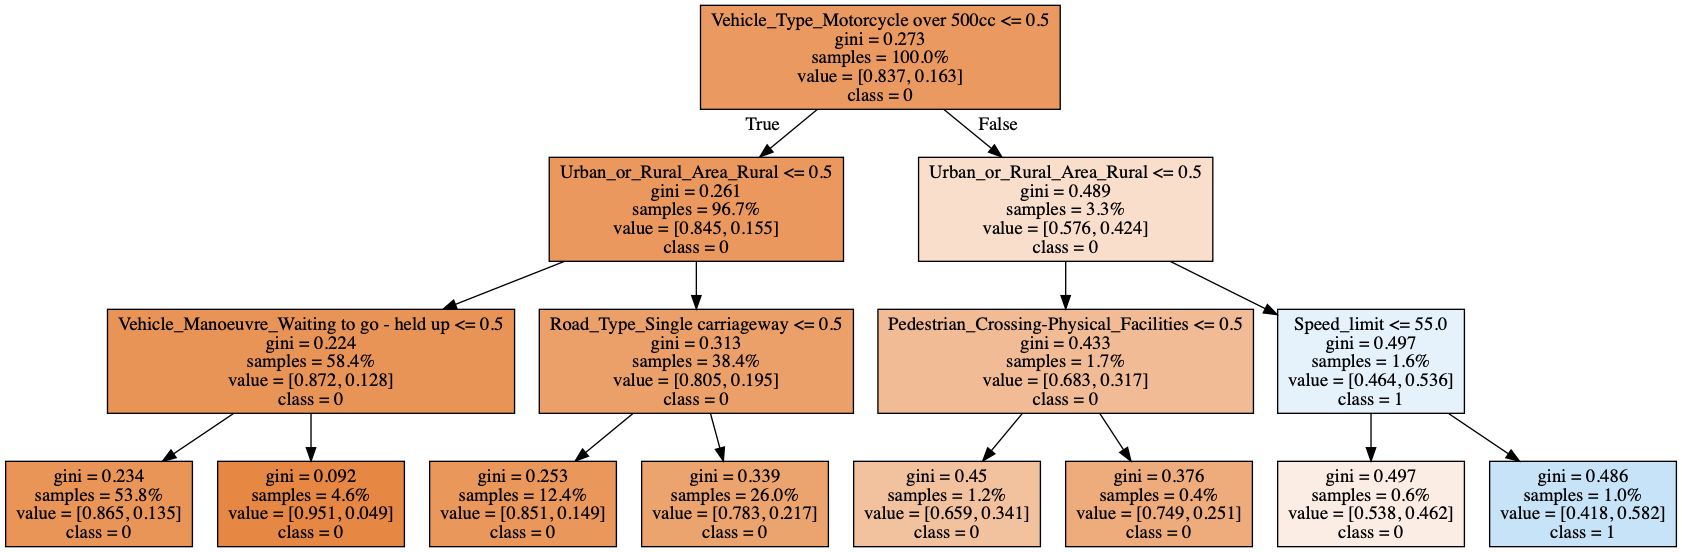

In [34]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X,Y)

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', proportion = True, 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

The tree above demonstrates the following findings:
<ul><li>Motorcycles over 500cc</li></ul>
<ol>
<li> Among all types of vehicles, motorcycles over 500cc are much more prone to severe accidents. Within the accidents happening to them, 42.4% are severe.</li>
<li>The accidents happening to motorcycles over 500cc in rural areas is more dangerous: over 50% are severe accidents. The most dangerous situation is on roads with speed limits over 55 mph in rural areas: the severe accident rate is 58.2%.</li>

<ul><li>Other Types of Vehicles</li></ul>
<ol>
<li> For other types of vehicles, driving in rural areas is generally more dangerous than driving in urban areas, driven by the higher-than-average severe accident rates on rural singe carriageways. Accidents happening on other types of roads in rural areas have similar levels of severity.</li>
<li> The least severe situation for these types of vehicles happens in urban areas when the vehicles are held up. </li>
</ol>

# <u> 4. Machine Learning: Clustering </u>

In [28]:
from sklearn.cluster import KMeans

In [29]:
clu = KMeans(n_clusters=2, random_state=0)
df3 = df2.copy()
df3 = (df3 - df3.mean()) / df3.std()
clu.fit(df3)
df4 = df2.copy()
df4['Cluster'] = clu.labels_
df4.groupby('Cluster').mean().T

Cluster,0,1
Accident_Severity,0.209632,0.132291
Pedestrian_Crossing-Physical_Facilities,0.169974,1.164745
Speed_limit,52.178191,31.480926
Age_Band_of_Driver,7.015623,6.907478
Age_of_Vehicle,8.168352,8.038441
Day_of_Week_Friday,0.168907,0.166042
Day_of_Week_Monday,0.141327,0.140577
Day_of_Week_Saturday,0.125148,0.133557
Day_of_Week_Sunday,0.117367,0.104759
Day_of_Week_Thursday,0.152774,0.152671


Through clustering, we detected two different groups: Cluster 0 has higher probability to get severe injuries, and it has following characteristics compared to Cluster 1:
<ul>
<li> significantly fewer pedestrian crossing physical facilities on site; </li>
<li> a much higher road speed limit (on average 21 mph higher);</li>
<li> much higher percentage of 'lights unlit' in darkness, which is one type of dangerous and careless driving;</li>
<li> a significantly much higher percentage that the accident happens in rural areas (99% vs almost 0%).</li>
</ul>

# <u> 5. Final Finding and Validity through Seaborn</u>

Based on the decision tree and clustering above, we find that motorcycle over 500cc, Rural Area and Speed_limit over 55 mph lead to severe accidents. So we want to take a closer look at motorcycle over 500cc and other types of vehicles's severe accident rates, across different speed limits, in both rural and urban areas.

In [30]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Finding

The severe accident rates of motorcyle over 500cc are higher across all speed limits in rural areas than urban areas. Interestingly, for both motorcycle over 500cc and other types of vechiles, speed limit at 60 mph is a relatively safe situation in urban areas. However, in rural areas, the severe accident rate at 60 mph surges significantly to become the top killer. 

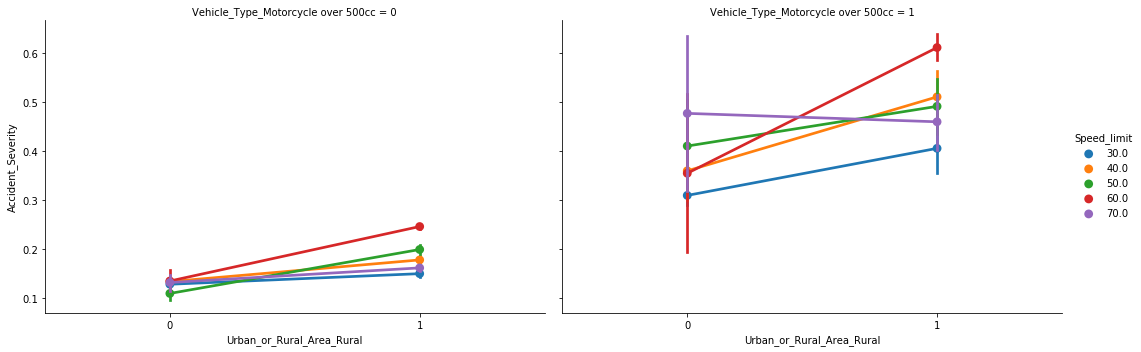

In [31]:
# To make the graph clear, we dropped the data of Speed_limit < 30, otherwise the large confident interval of \
# Speed_limit = 20.0 will overlap others.
sns.catplot(data=df2[df2.Speed_limit >= 30],y='Accident_Severity',x='Urban_or_Rural_Area_Rural', kind ='point', \
            aspect=1.5, hue='Speed_limit', col = 'Vehicle_Type_Motorcycle over 500cc')

#### Cause

Then we examined the road types associated with different speed limits in urban and rural areas. We know that a single carriageway is a very dangerous road type because of a lack of physical barriers between two sides of the road. In urban areas, most vehicles driving on single carriageways are at a speed limit of 30 mph. Even though single carriageways are dangerous, because of the low speed limits, the accidents are less likely to be severe. However, in rural areas, most vehicles driving at single carriageways are at a speed limit of 60 mph. Thus, urban or rural areas are not the real cause of severe accidents, instead, a dangerous road type combining a high speed is the main reason. A safe road type with a high speed limit - eg. 70 mph dual carriageways - is actually safer.

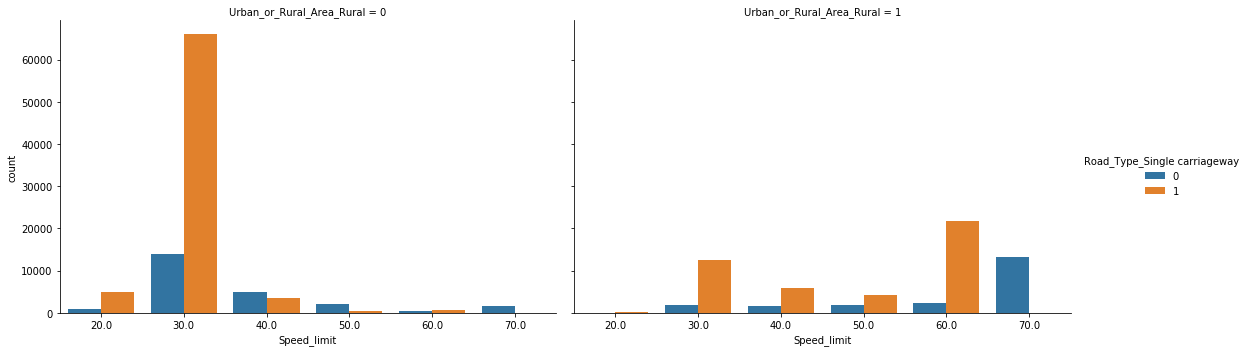

In [32]:
sns.catplot(data=df2,x='Speed_limit',kind ='count', aspect=1.5, hue='Road_Type_Single carriageway', \
            col = 'Urban_or_Rural_Area_Rural')

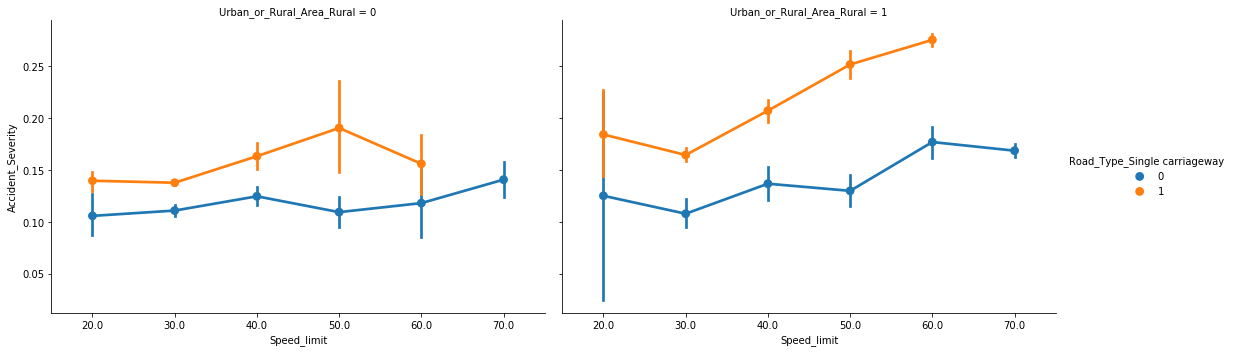

In [33]:
sns.catplot(data=df2,y='Accident_Severity',x='Speed_limit',hue='Road_Type_Single carriageway',kind ='point', \
            aspect=1.5, col = 'Urban_or_Rural_Area_Rural')

# <u> 6.  Managerial Insights</u>

After analysis on UK Road Safety: Traffic Accidents and Vehicles, we have following considerations: 
<ul> 
<li> Motorcycles over 500cc are exposed to more severe accidents.</li>
<li> An accident that happens on a single carriageway (a dangerous road type) with a high speed limit is much more severe.</li>
</ul>

There are so many areas to improve road safety, but since the resources of the government is limited, we suggest it to focus on areas that can reduce the most dangerous accidents:
<ul><li>For rural areas:</li></ul>
<ol>
<li> Set the speed limit of motorcycle over 500cc under 55 mph; or increase the minimun distance away from motorcycles when the speed limit is over 55 mph. </li>
<li> For road infrastructures, when designing a high speed and fast moving road, avoid single carriageways and go for dual carriageways. The budget for a dual carriageway might be higher, but it saves money in rescue, road cleaning and maintenance from severe accidents.</li>
</ol>

<ul><li>For urban areas:</li></ul>
<ol>
<li>Add more pedestrian crossing physical facilities such as signs, signals, warnings or reminders for continous alert near motorcycles.</li>
<li>Encourage drivers to develop good driving habits such as holding up when waiting.</li>
</ol>
This is a surprising finding as one may think conceptually accidents would be affected by gender, age of driver, etc. However, from our findings, these are not the most critical factors leading to severe accidents. Therefore, from our perspective, instead of focusing on car age, age of driver, etc, drivers should focus on how they behave on the road to avoid getting into a severe accident.